# Visualisation : Travaux Pratiques

On voudra visualiser les informations suivantes à partir du [jeu de données sur les tailles des parents et des enfants](../../data/Heights/Galton.txt).


Lorsqu'il y a plusieurs visualisations possibles, indiquer les avantages et inconvénients de chacune.


Après une visualisation, indiquer l'information que l'on peut en tirer.

## Préliminaires

Charger le jeu de données avec pandas

In [1]:
import pandas as pd

In [2]:
galton= pd.read_csv("../../data/Heights/Galton.txt", header=0, sep="\t")

FileNotFoundError: [Errno 2] No such file or directory: '../../data/Heights/Galton.txt'

In [2]:
galton= pd.read_csv("./Data/Heights/Galton.txt", header=0, sep="\t")

In [3]:
galton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Family  898 non-null    object 
 1   Father  898 non-null    float64
 2   Mother  898 non-null    float64
 3   Gender  898 non-null    object 
 4   Height  898 non-null    float64
 5   Kids    898 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 42.2+ KB


Convertir les tailles en centimètres.

In [4]:
galton.loc[:,['Height','Father','Mother']]=galton.loc[:,['Height','Father','Mother']]*2.54

Initlialiser la bibliothèque seaborn

In [5]:
%matplotlib inline
import seaborn as sns

## Histogrammes et distributions

## Enfants

Visualiser l'histogramme des tailles des enfants

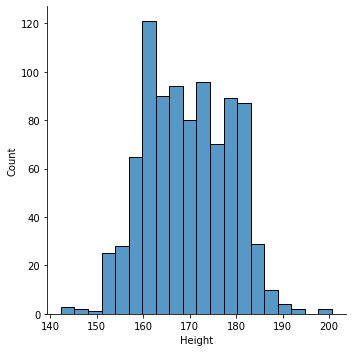

In [6]:
sns.displot(x="Height", data=galton);

Visualiser l'histogramme des tailles des garçons et des filles

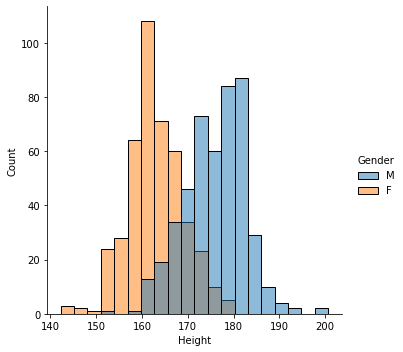

In [7]:
sns.displot(x="Height", hue="Gender", data=galton);

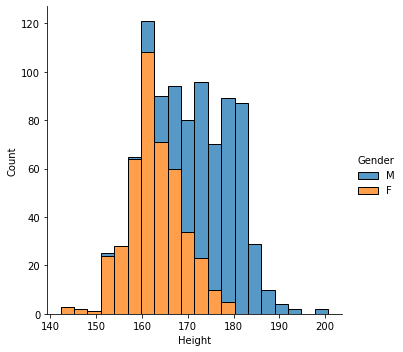

In [8]:
sns.displot(x="Height", hue="Gender",multiple="stack", data=galton);

Visualiser la distribution des tailles des enfants

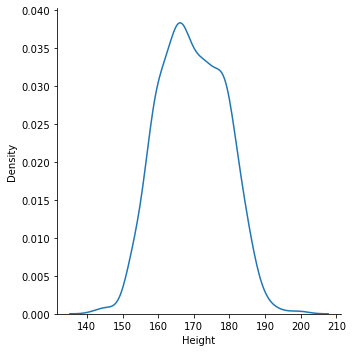

In [9]:
sns.displot(x="Height",  kind="kde", data=galton);

Visualiser la distribution des tailles des garçons et des filles

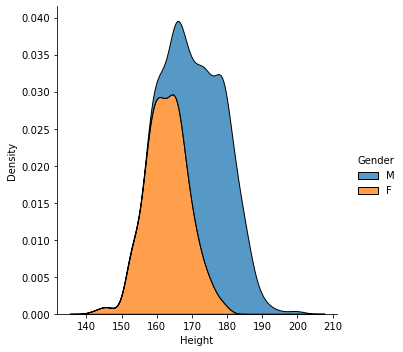

In [10]:
sns.displot(x="Height", hue="Gender", multiple="stack", kind="kde", data=galton);

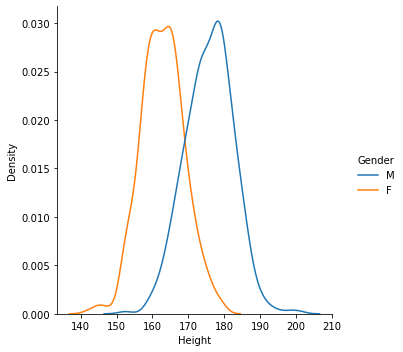

In [11]:
sns.displot(x="Height", hue="Gender", kind="kde", data=galton);

## Parents

Visualiser l'histogramme des tailles des parents

In [12]:
galton_parents=galton.groupby('Family').first()[['Father','Mother']]

On peut regrouper dans une seule colonne les deux colonnes de plusieurs façons :
- avec `.stack()` :

In [13]:
type(galton_parents.stack())

pandas.core.series.Series

- en concaténant les colonnes :

In [14]:
type(pd.concat([galton_parents['Father'], galton_parents['Mother']]))

pandas.core.series.Series

Dans les deux cas on obtient une *Series* qu'on peut passer directement en argument nommé `x` de `displot` (sans passer d'argument `data`, donc): 

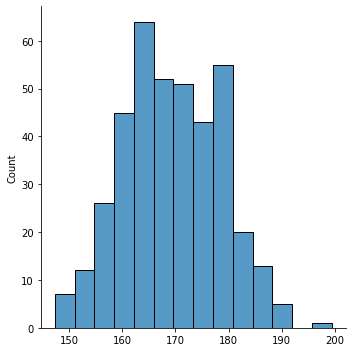

In [15]:
sns.displot(x=galton_parents.stack());

Mais on a perdu l'affichage de la légende de l'abscisse. Pour la récupérer il faut recréer une *DataFrame* :

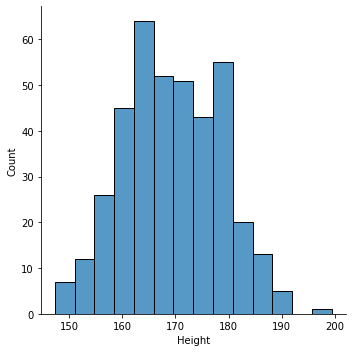

In [16]:
sns.displot(x='Height', data=galton_parents.stack().to_frame('Height'));

Visualiser l'histogramme des tailles des pères et des mères

Pour pouvoir utiliser l'argument nommé `hue`, il faut passer du format 'large' (une colonne par type de données, ici une colonne `'Father'` et une colonne `'Mother'`) à une colonne de données (par exemple nommée elle aussi `'Height'`) et une colonne indiquant le type de données (par exemple nommée elle aussi `'Gender'`)

In [17]:
galton_parents.stack().reset_index().rename(columns={0:'Height','level_1':'Gender'})

Family  Gender  Height
0        1  Father  199.39
1        1  Mother  170.18
2       10  Father  187.96
3       10  Mother  166.37
4      100  Father  175.26
..     ...     ...     ...
389     97  Mother  173.99
390     98  Father  175.26
391     98  Mother  170.18
392     99  Father  175.26
393     99  Mother  167.64

[394 rows x 3 columns]

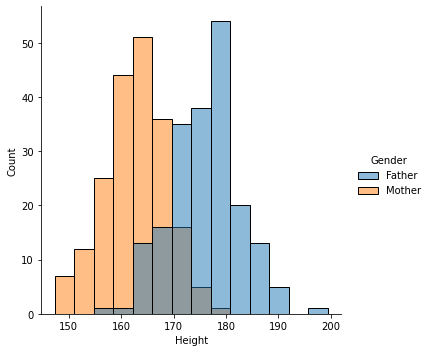

In [18]:
sns.displot(x='Height', hue='Gender',
            data=galton_parents.stack().reset_index().rename(columns={0:'Height','level_1':'Gender'}));

On aurait aussi pu faire :

In [19]:
fathers= galton_parents[['Father']] # [['Father']] et non ['Father'] pour avoir une DataFrame et non une Series !
mothers= galton_parents[['Mother']]

In [20]:
fathers['Gender']='M'
mothers['Gender']='F'
parents=fathers.rename(columns={'Father' :'Height'}).append(mothers.rename(columns={'Mother':'Height'}))
parents

Height Gender
Family               
1       199.39      M
10      187.96      M
100     175.26      M
101     175.26      M
102     175.26      M
...        ...    ...
95      148.59      F
96      147.32      F
97      173.99      F
98      170.18      F
99      167.64      F

[394 rows x 2 columns]

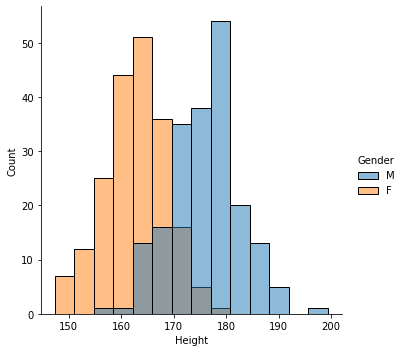

In [21]:
sns.displot(x='Height', hue='Gender', data= parents);

# Synthèse d'attributs

## Taille des parents

Créer un attribut `"Parents"` qui est la moyenne de la taille du père et de la taille de la mère.

In [22]:
galton["Parents"]=(galton["Father"]+galton["Mother"])/2

In [23]:
galton['Parents'].describe()

count    898.000000
mean     169.312921
std        4.447566
min      157.480000
25%      166.370000
50%      169.545000
75%      171.450000
max      184.785000
Name: Parents, dtype: float64

Créer un attribut `"ParentsCat"` qui indique :
- `"Short"` si l'attribut `"Parents"` est dans le premier quartile
- `"Tall"` si l'attribut `"Parents"` est dans le dernier quartile
- `"Average"` sinon

Pour avoir le premier quartile, on peut faire :

In [24]:
galton["Parents"].quantile(0.25)

166.37

On s'occupe d'abord de la valeur par défaut :

In [25]:
galton["ParentsCat"]="Average"

In [26]:
galton.loc[galton["Parents"]<galton["Parents"].quantile(0.25),  "ParentsCat"]="Short"

In [27]:
galton.loc[galton["Parents"]>galton["Parents"].quantile(0.75),"ParentsCat"]="Tall"

Créer un attribut `"ParentsDelta"` qui indique la taille du père moins la taille de la mère.

In [28]:
galton['ParentsDelta']= galton['Father']-galton['Mother']

Visualiser la distribution de `"ParentsDelta"`.

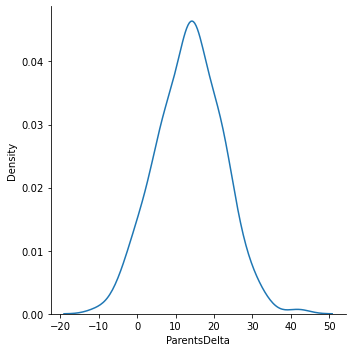

In [30]:
sns.displot(x="ParentsDelta",  kind="kde", data=galton.groupby("Family").first());

# Visualisation de relations

Visualiser la relation entre la taille des enfants et la taille des parents (en utilisant l'attribut `"Parents"`)

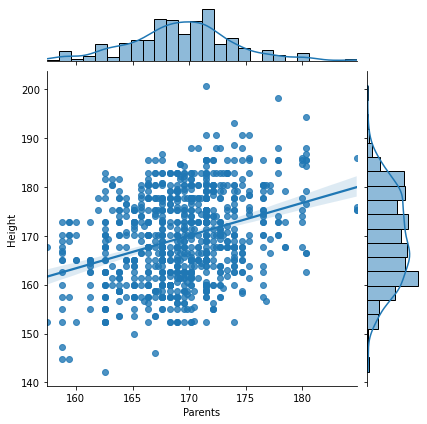

In [32]:
sns.jointplot(x="Parents", y="Height", kind="reg", data=galton);

Visualiser la relation entre la taille des enfants, en distinguant garçons et filles, et la taille des parents (en utilisant l'attribut `"Parents"`)

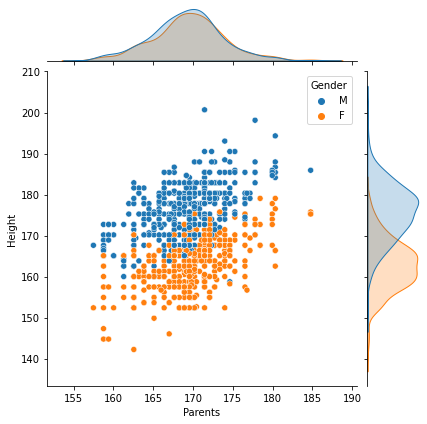

In [34]:
sns.jointplot(x="Parents", y="Height", hue="Gender", data=galton);

Visualiser la distribution des tailles du père et de la mère pour chaque catégorie de taille de parents.

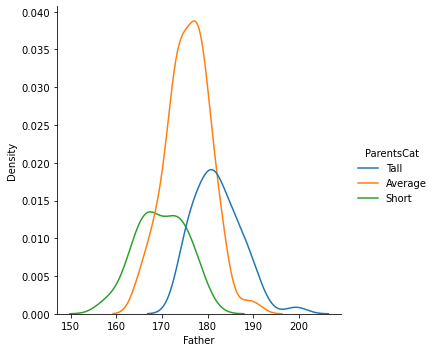

In [35]:
sns.displot(x="Father",  kind="kde", hue="ParentsCat", data=galton.groupby("Family").first());

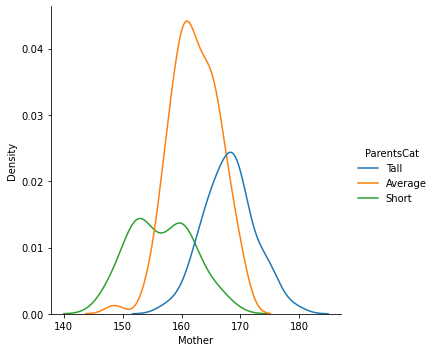

In [36]:
sns.displot(x="Mother",  kind="kde", hue="ParentsCat", data=galton.groupby("Family").first());

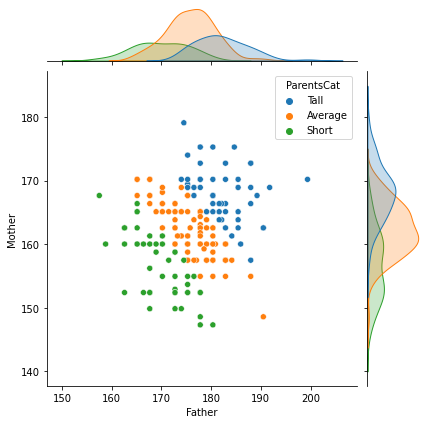

In [37]:
sns.jointplot(x="Father", y="Mother", hue="ParentsCat", data=galton.groupby("Family").first());

Visualiser la relation entre des tailles des enfants et celles des parents (moyenne) pour les parents de la catégorie `"Tall"`.

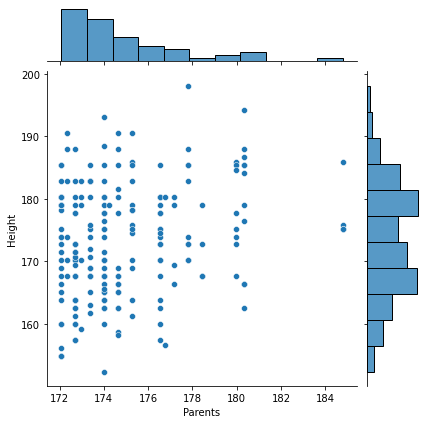

In [41]:
sns.jointplot(x="Parents", y="Height", data=galton[galton["ParentsCat"]=="Tall"]);

In [42]:
galton[galton["ParentsCat"]=="Tall"]['Height'].mean()

173.40044036697248

In [43]:
galton[galton["ParentsCat"]=="Tall"]['Parents'].mean()

174.88366055045876

Visualiser la distribution de la taille des parents pour chaque nombre d'enfants

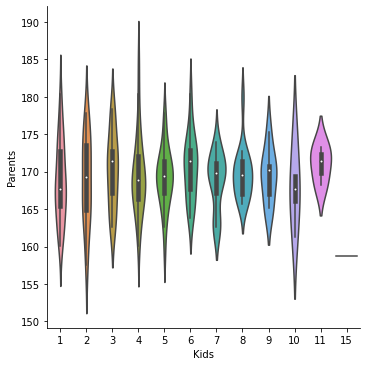

In [46]:
sns.catplot(y="Parents", x="Kids", kind="violin", data=galton.groupby('Family').first());

Visualiser la distribution de la taille des enfants pour chaque nombre d'enfants

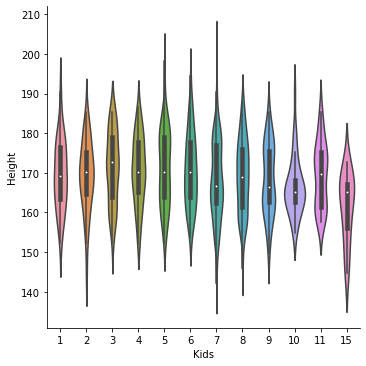

In [45]:
sns.catplot(y="Height", x="Kids", kind="violin", data=galton);

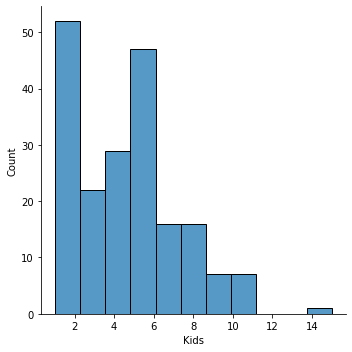

In [47]:
sns.displot(x="Kids", data=galton.groupby('Family').first());